# Plot PowerAlphaBeta Test

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-notebook')

%matplotlib inline

In [2]:
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
# Replace this variable accordingly 
path_to_results_alpha = "../experiments/2018-11-06-13-48_PowerAlpha_/"
path_to_results_beta = "../experiments/2018-11-10-11-23_PowerBeta_/"

In [4]:
data_alpha = pd.read_csv(path_to_results_alpha + "PowerAlpha.csv", header=0)
data_alpha["category"] = [x.split("-")[0] for x in data_alpha["refId"]]

In [5]:
data_beta = pd.read_csv(path_to_results_beta + "PowerBeta.csv", header=0)
data_beta["category"] = [x.split("-")[0] for x in data_beta["refId"]]

In [7]:
print((data_alpha["refId"] == "refId").sum()) # must be 0 
print((data_beta["refId"] == "refId").sum()) # must be 0 

0
0


In [8]:
data_alpha["nDim"].unique()
# data_beta["nDim"].unique()

array([2, 3, 5])

In [9]:
data_alpha["noise"].unique()
# data_beta["noise"].unique()

array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        ])

In [10]:
data_alpha["category"].unique()
# data_beta["category"].unique()

array(['0', 'LinearThenDummy', 'LinearPeriodic_2', 'Linear', 'Sine_5',
       'LinearSteps_20', 'LinearPeriodic_5', 'LinearPeriodic_10',
       'Sine_2', 'LinearStairs_5', 'Hourglass', 'DoubleLinear_0.25',
       'DoubleLinear_0.5', 'Sine_20', 'Cross', 'HyperSphere',
       'NonCoexistence', 'Cubic_3', 'Sqrt_2', 'Parabolic_2',
       'RandomSteps_10', 'LinearPeriodic_20', 'LinearThenNoise', 'Sqrt_1',
       'LinearSteps_2', 'Sine_10', 'LinearStairs_10', 'RandomSteps_2',
       'Parabolic_3', 'Sqrt_3', 'Cubic_1', 'RandomSteps_5',
       'DoubleLinear_0.75', 'Parabolic_1', 'Hypercube', 'Cubic_2',
       'RandomSteps_20', 'LinearStairs_2', 'StraightLines',
       'LinearSteps_5', 'LinearSteps_10', 'LinearStairs_20', 'Z', 'Zinv',
       'HypercubeGraph', 'Star', 'Independent', 'Sine_1'], dtype=object)

## Settings

In [11]:
selectedCategories = ['Linear','Independent', 'Star'] # Must be 3 Cats

In [13]:
selectedTest = "MWP" # Must be 1 Test

In [19]:
varPara = "beta" # Must be either or "alpha" or "beta"

if varPara == "alpha":
    data = data_alpha
elif varPara == "beta": 
    data = data_beta
else: 
    raise ValueError("varPara must be either or \"alpha\" or \"beta\"") 
    
selectedDims = data["nDim"].unique()
selectedDims # Must be 3 Dims

array([2, 3, 5])

In [15]:
# manually
# selectedDims = [2,3,5]

array([2, 3, 5])

## Plot Contrast

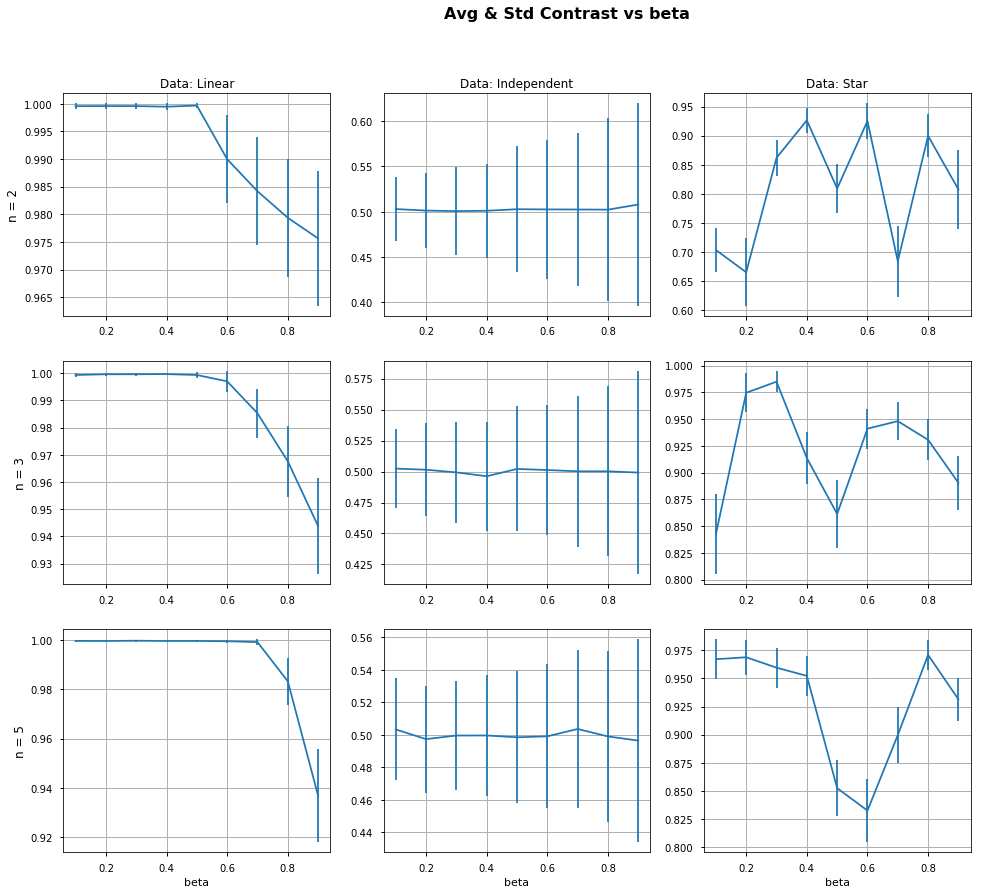

In [20]:
# noise == 0
fig = plt.figure(figsize = (14,12)) # Adjust Size 
fig.suptitle("Avg & Std Contrast vs " + varPara, fontweight = "bold", fontsize = 16)

# 1 Row
subset = data[(data["category"] == selectedCategories[0]) & (data["nDim"] == selectedDims[0]) & (data["testId"] == selectedTest) & (data["noise"] == 0)]
plt.subplot(331)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.ylabel("n = " + str(selectedDims[0]), size = "large")
plt.title("Data: " + selectedCategories[0])
plt.grid(True)
plt.subplots_adjust(bottom = 0.001, left = 0.0001)

subset = data[(data["category"] == selectedCategories[1]) & (data["nDim"] == selectedDims[0]) & (data["testId"] == selectedTest) & (data["noise"] == 0)]
plt.subplot(332)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.title("Data: " + selectedCategories[1])
plt.grid(True)

subset = data[(data["category"] == selectedCategories[2]) & (data["nDim"] == selectedDims[0]) & (data["testId"] == selectedTest) & (data["noise"] == 0)]
plt.subplot(333)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.title("Data: " + selectedCategories[2])
plt.grid(True)

# 2 Row 
subset = data[(data["category"] == selectedCategories[0]) & (data["nDim"] == selectedDims[1]) & (data["testId"] == selectedTest) & (data["noise"] == 0)]
plt.subplot(334)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.ylabel("n = " + str(selectedDims[1]), size = "large")
plt.grid(True)
plt.subplots_adjust(bottom = 0.001, left = 0.0001)

subset = data[(data["category"] == selectedCategories[1]) & (data["nDim"] == selectedDims[1]) & (data["testId"] == selectedTest) & (data["noise"] == 0)]
plt.subplot(335)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.grid(True)

subset = data[(data["category"] == selectedCategories[2]) & (data["nDim"] == selectedDims[1]) & (data["testId"] == selectedTest) & (data["noise"] == 0)]
plt.subplot(336)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.grid(True)

# 3 Row
subset = data[(data["category"] == selectedCategories[0]) & (data["nDim"] == selectedDims[2]) & (data["testId"] == selectedTest) & (data["noise"] == 0)]
plt.subplot(337)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.ylabel("n = " + str(selectedDims[2]), size = "large")
plt.xlabel(str(varPara))
plt.grid(True)
plt.subplots_adjust(bottom = 0.001, left = 0.0001)

subset = data[(data["category"] == selectedCategories[1]) & (data["nDim"] == selectedDims[2]) & (data["testId"] == selectedTest) & (data["noise"] == 0)]
plt.subplot(338)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.xlabel(str(varPara))
plt.grid(True)

subset = data[(data["category"] == selectedCategories[2]) & (data["nDim"] == selectedDims[2]) & (data["testId"] == selectedTest) & (data["noise"] == 0)]
plt.subplot(339)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.xlabel(str(varPara))
plt.grid(True)

# Saving 
savestring = ("Contrast " + varPara + "_" + selectedCategories[0] + " " + selectedCategories[1] + " " 
              + selectedCategories[2])
savepath = "plots/"
fig.savefig(savepath + savestring + ".pdf", bbox_inches='tight')